Cell size dx = 0.25 , dy = 0.25
Mesh shape = (8, 4)


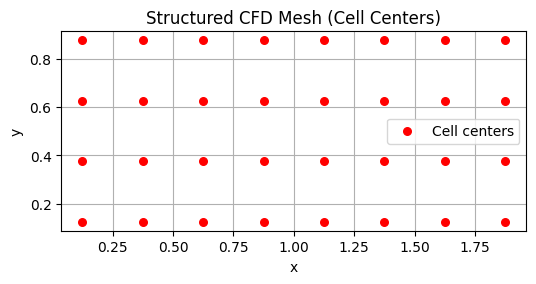

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_mesh(Lx, Ly, Nx, Ny):
    """
    Generate a square CFD mesh with nodes at cell centers.

    Parameters:
    -----------
    Lx : float
        Length in x-direction
    Ly : float
        Length in y-direction
    Nx : int
        Number of cells along x
    Ny : int
        Number of cells along y

    Returns:
    --------
    X, Y : 2D numpy arrays
        Mesh node coordinates (cell centers)
    dx, dy : float
        Cell sizes
    """

    dx = Lx / Nx
    dy = Ly / Ny

    # cell centers (not corners!)
    x_centers = np.linspace(dx/2, Lx - dx/2, Nx)
    y_centers = np.linspace(dy/2, Ly - dy/2, Ny)

    X, Y = np.meshgrid(x_centers, y_centers, indexing="ij")

    return X, Y, dx, dy


# Example usage:
Lx, Ly = 2.0, 1.0   # domain size
Nx, Ny = 8, 4       # number of cells

X, Y, dx, dy = generate_mesh(Lx, Ly, Nx, Ny)

print("Cell size dx =", dx, ", dy =", dy)
print("Mesh shape =", X.shape)

# Plot the mesh
plt.figure(figsize=(6,3))
plt.scatter(X, Y, c='red', s=30, label="Cell centers")
plt.grid(True)
plt.gca().set_aspect('equal')
plt.title("Structured CFD Mesh (Cell Centers)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()